In [1]:
import numpy as np #general library, will come in handy later
import pandas as pd #another nice library for storing matrices, it rely's on numpy

import matplotlib.pyplot as plt #this library is for graphing things

#useful functions for this assignment
from sklearn import svm
from sklearn.model_selection import GridSearchCV

## Part a

In [2]:
#import the .csv we write into memory
df = pd.read_csv('Hearts_Dummy.csv')
df = df.dropna()
df_train = df.loc[df['Thal_normal']==1]

Below are the scatter plots you were assked to construct. Although there appears the be a seperation in the first graph between the points, it is clear that there is no natural hyperplane seperating the data.

Text(0,0.5,'Oldpeak')

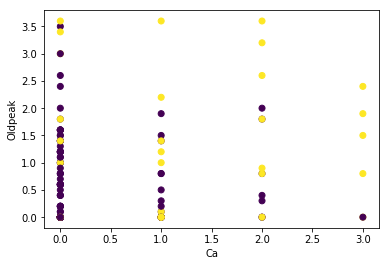

In [3]:
plt.scatter(df_train['Ca'], df_train['Oldpeak'], c=df_train['AHD_Yes'])
plt.xlabel('Ca')
plt.ylabel('Oldpeak')

Text(0,0.5,'MaxHR')

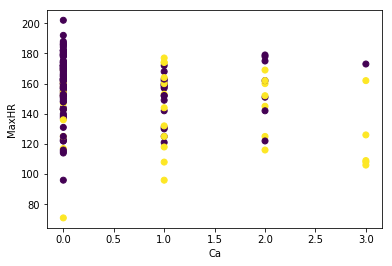

In [4]:
plt.scatter(df_train['Ca'], df_train['MaxHR'], c=df_train['AHD_Yes'])
plt.xlabel('Ca')
plt.ylabel('MaxHR')

Text(0,0.5,'MaxHR')

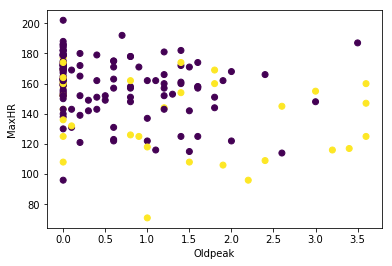

In [5]:
plt.scatter(df_train['Oldpeak'], df_train['MaxHR'], c=df_train['AHD_Yes'])
plt.xlabel('Oldpeak')
plt.ylabel('MaxHR')

## Part b

In [6]:
#work with the entire data set, some of you did not but I didn't penalize for this
X = df[['Ca','Oldpeak','MaxHR']]
y = df['AHD_Yes']

In [7]:
#search for the optimal parameters using cross validation
#C_grid = np.array(range(5,15)) *.0001 
C_grid = np.array( range(10,200,10) )
gamma_grid = np.array( range(10,200,10) )*.0001

param_grid = {'C':C_grid, 'gamma':gamma_grid}


grid_search = GridSearchCV(svm.SVC(), param_grid, cv=5)
grid_search.fit(X,y)

C_opt = grid_search.best_params_['C']
gamma_opt = grid_search.best_params_['gamma']

In [8]:
print 'Optimal C: %s, Optimal Gamma: %s'%(C_opt, gamma_opt)

Optimal C: 50, Optimal Gamma: 0.002


In [9]:
clf = svm.SVC(gamma = gamma_opt, C = C_opt)
clf.fit(X,y)
prediction = clf.predict([[1,2.5,150]])

print 'Prediction: %s'%prediction[0]

Prediction: 1


* When $C$ is small, we are overfitting fitting our model to only a few observations. This means that the variance will be low, but our model is biased because it is overfitted. If $C$ is large, we have higher variance and lower bias.
* When $\gamma$ is large our kernel function assigns positive weight more points. As a result, a large $\gamma$ increases the variance of our predictor. We must decrease the size of $\gamma$ as the data gets larger. However, if $\gamma$ is too small, we introduce bias.